## Day 14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("climate_dashboard_base.csv")

In [4]:
X = df[['Temp Max', 'Temp_Range', 'Season', 'Year']]
y = df['Rain']

X = pd.get_dummies(X, columns=['Season'], drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [7]:
error_df = X_test.copy()
error_df["Actual_Rain"] = y_test.values
error_df["Predicted_Rain"] = y_pred
error_df["Error"] = error_df["Actual_Rain"] - error_df["Predicted_Rain"]

In [8]:
error_df["Abs_Error"] = error_df["Error"].abs()

In [9]:
error_df.sort_values("Abs_Error", ascending=False).head(10)

,Temp Max,Temp_Range,Year,Season_Post-Monsoon,Season_Summer,Season_Winter,Actual_Rain,Predicted_Rain,Error,Abs_Error
25728,26.4,3.0,2021.0,False,False,False,231.0,17.0750,213.9250,213.9250
25764,31.6,8.1,2021.0,False,False,False,253.0,48.1000,204.9000,204.9000
26114,27.2,3.2,2022.0,False,False,False,175.0,47.3750,127.6250,127.6250
26153,28.1,3.5,2022.0,False,False,False,124.0,41.2920,82.7080,82.7080
26572,30.9,6.5,2023.0,True,False,False,3.0,78.8800,-75.8800,75.8800
26189,27.8,2.9,2022.0,False,False,False,22.0,91.3620,-69.3620,69.3620
25729,29.7,6.3,2021.0,False,False,False,107.0,39.2200,67.7800,67.7800
26477,29.3,4.5,2023.0,False,False,False,122.0,55.1600,66.8400,66.8400
25818,29.7,5.9,2021.0,False,False,False,79.0,12.1900,66.8100,66.8100
26507,27.6,3.0,2023.0,False,False,False,36.0,91.5225,-55.5225,55.5225


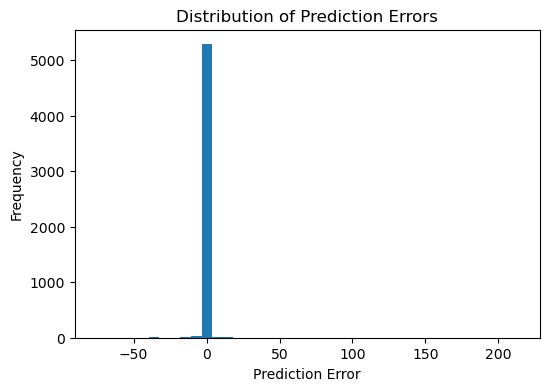

In [10]:
plt.figure(figsize=(6,4))
plt.hist(error_df["Error"], bins=40)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

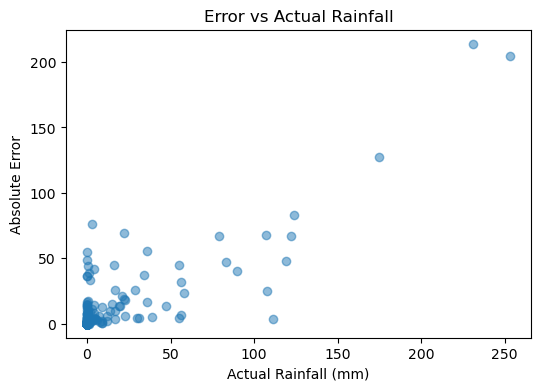

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(error_df["Actual_Rain"], error_df["Abs_Error"], alpha=0.5)
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Absolute Error")
plt.title("Error vs Actual Rainfall")
plt.show()

Day 14 – Error Analysis Summary
The model performs well for low to moderate rainfall values but shows higher error during extreme rainfall events. This is expected due to the chaotic nature of weather patterns and limited extreme-event samples. Error analysis revealed that most large deviations occur during peak monsoon periods, suggesting the need for additional features or time-series modeling in future iterations.